# setup

In [ ]:
!pip install openml
# !pip install autogluon
# !pip install smac
!pip install scikit-optimize

In [4]:
import openml
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import set_config
set_config(transform_output = "pandas")
import random
import xgboost as xgb
from skopt.space import Real, Integer
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import matplotlib.pyplot as plt

In [ ]:
random.seed(37)

### importing adult set

In [ ]:
openml.datasets.list_datasets(output_format="dataframe")

# Get dataset by ID
dataset = openml.datasets.get_dataset(45068)
# Get the data itself as a dataframe (or otherwise)
X, y, _, _ = dataset.get_data(dataset_format="dataframe")


y = X['class']
X = X.drop('class', axis=1)

le = LabelEncoder()
dummy_y = le.fit_transform(y)
dummy_X = pd.get_dummies(X).drop(["sex_Male"], axis=1)

X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(dummy_X, dummy_y,test_size=0.2)


/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


### importing blood-transfusion-service-center

In [ ]:
openml.datasets.list_datasets(output_format="dataframe")

# Get dataset by ID
dataset = openml.datasets.get_dataset(1464)
# Get the data itself as a dataframe (or otherwise)
X, y, _, _ = dataset.get_data(dataset_format="dataframe")


y = X['Class']
X = X.drop('Class', axis=1)

le = LabelEncoder()
dummy_y = le.fit_transform(y)

X_btsc_train, X_btsc_test, y_btsc_train, y_btsc_test = train_test_split(X, dummy_y,test_size=0.2)

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


## importing diabetes

In [ ]:
openml.datasets.list_datasets(output_format="dataframe")

# Get dataset by ID
dataset = openml.datasets.get_dataset(37)
# Get the data itself as a dataframe (or otherwise)
X, y, _, _ = dataset.get_data(dataset_format="dataframe")


y = X['class']
X = X.drop('class', axis=1)

le = LabelEncoder()
dummy_y = le.fit_transform(y)

X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X, dummy_y, test_size=0.2)

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


## importing phoneme

In [ ]:
openml.datasets.list_datasets(output_format="dataframe")

# Get dataset by ID
dataset = openml.datasets.get_dataset(1489)#(1462)
# Get the data itself as a dataframe (or otherwise)
X, y, _, _ = dataset.get_data(dataset_format="dataframe")


y = X['Class']
X = X.drop('Class', axis=1)

le = LabelEncoder()
dummy_y = le.fit_transform(y)

X_ba_train, X_ba_test, y_ba_train, y_ba_test = train_test_split(X, dummy_y,test_size=0.2)

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


# XGBoost

In [ ]:
results_rs = pd.DataFrame()
results_bs = pd.DataFrame()
results_bs1 = pd.DataFrame()
results_bs2 = pd.DataFrame()
results_bs3 = pd.DataFrame()

## Param grid

In [ ]:
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
grid_params_rs = [{
    "n_estimators": randint(1,5000),
    "learning_rate": uniform(0,10),
    "max_depth": randint(1,15),
    "min_child_weight": uniform(0,7)
}]

In [ ]:
grid_params_bs = [{
    "n_estimators": Integer(1,5000),
    "learning_rate": Real(0,10),
    "max_depth": Integer(1,15),
    "min_child_weight": Real(0,7)
}]

## model definitions

In [ ]:
m1 = xgb.XGBClassifier(random_state=21)

In [ ]:
grid = RandomizedSearchCV(m1,grid_params_rs, scoring='roc_auc', random_state=37, n_iter=50)

In [ ]:
bscv = BayesSearchCV(m1, grid_params_bs, random_state=21, scoring="roc_auc", n_iter=50)

## adult set

In [ ]:
X_train, X_test, y_train, y_test = X_a_train.copy(), X_a_test.copy(), y_a_train.copy(), y_a_test.copy()

### random search

In [ ]:
grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                   param_distributions=[{'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e4725f7ac20>,
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4725f7b970>,
                                         'min_child_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e4725f7af20>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4725f7aa40>}],
                   random_state=37, scoring='roc_auc')

In [ ]:
results_rs["params"] = grid.cv_results_["params"]

In [ ]:
results_rs["a_scores"] = grid.cv_results_["mean_test_score"]

### bayesian optimalization

#### smac

W komórkach poniżej znajduje się zakomentowana nasza implementacja Bayes Optimization z wykorzystaniem pakietu SMAC. Ostatecznie porzuciliśmy ten sposób na rzecz BayesSearchCV z pakietu scikit-optimize. Nasza decyzja spowodowana była problemami z reprodukcją wyników optymalizacji.

In [ ]:
# from ConfigSpace import ConfigurationSpace, Configuration
# import smac

In [ ]:
# cs = ConfigurationSpace(grid_params[0])

In [ ]:
# def xgb_opt(cfg: Configuration, seed: int = 0):
#   cfg_dict = dict(cfg)
#   model = xgb.XGBClassifier(**cfg_dict,
# #     n_estimators = cfg["n_estimators"],
# #     learning_rate = cfg["learning_rate"],
# # #     subsample = cfg["subsample"],
# #     booster = cfg["booster"],
# # #     max_depth = cfg["max_depth"],
# # #     min_child_weight = cfg["min_child_weight"],
# # #     colsample_bytree = cfg["colsample_bytree"],
# # #     colsample_bylevel = cfg["colsample_bylevel"],
# # #     reg_lambda = cfg["reg_lambda"],
# #     reg_alpha = cfg["reg_alpha"],
#                             random_state=21, eval_metric='auc')
#   X_train_r, X_valid_r, y_train_r, y_valid_r = train_test_split(X_train, y_train, test_size=0.1, random_state=37)
#   fitted = model.fit(X_train_r, y_train_r)
#   score = fitted.score(X_valid_r, y_valid_r)
#   return 1-score


In [ ]:
# scenario = smac.Scenario(cs, n_trials=50)

In [ ]:
# facade = smac.HyperparameterOptimizationFacade(scenario, xgb_opt, overwrite=True)
# best_par_a = facade.optimize()

In [ ]:
# configs = []
# scores = []

# for config in facade.runhistory.get_configs():
#     scores.append(1-facade.runhistory.average_cost(config))
#     configs.append(str(dict(config)))

#### skopt

In [ ]:
bscv.fit(X_train, y_train)

BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_...
              random_state=21, scoring='roc_auc',
              search_spaces=[{'learning_rate': Real(low=0, high=10, prior='uniform', transform='normalize'),
                              'max_depth': Integer(low=1, high=15, prior='uniform', transform='normalize'),
                              'min_child_weight': Real(low=0, high=7, prior='uniform', transform='normalize'),
                              'n_estimators': Integer(low=1, high=5000, prior='uniform', transform='normalize')}])

In [ ]:
results_bs["params"] = bscv.cv_results_["params"]

In [ ]:
results_bs["a_scores"] = bscv.cv_results_["mean_test_score"]

## blood-transfusion-service-center

In [ ]:
X_train, X_test, y_train, y_test = X_btsc_train.copy(), X_btsc_test.copy(), y_btsc_train.copy(), y_btsc_test.copy()

###  randomized search


In [ ]:
grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                   param_distributions=[{'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e4725f7ac20>,
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4725f7b970>,
                                         'min_child_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e4725f7af20>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4725f7aa40>}],
                   random_state=37, scoring='roc_auc')

In [ ]:
results_rs["btsc_scores"] = grid.cv_results_["mean_test_score"]

### bayesian optimization

#### skopt

In [ ]:
bscv.fit(X_train, y_train)

BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_...
              random_state=21, scoring='roc_auc',
              search_spaces=[{'learning_rate': Real(low=0, high=10, prior='uniform', transform='normalize'),
                              'max_depth': Integer(low=1, high=15, prior='uniform', transform='normalize'),
                              'min_child_weight': Real(low=0, high=7, prior='uniform', transform='normalize'),
                              'n_estimators': Integer(low=1, high=5000, prior='uniform', transform='normalize')}])

In [ ]:
results_bs1["params"] = bscv.cv_results_["params"]

In [ ]:
results_bs1["scores"] = bscv.cv_results_["mean_test_score"]

## diabetes

In [ ]:
X_train, X_test, y_train, y_test = X_d_train.copy(), X_d_test.copy(), y_d_train.copy(), y_d_test.copy()

###  randomized search


In [ ]:
grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                   param_distributions=[{'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e4725f7ac20>,
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4725f7b970>,
                                         'min_child_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e4725f7af20>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4725f7aa40>}],
                   random_state=37, scoring='roc_auc')

In [ ]:
results_rs["d_scores"] = grid.cv_results_["mean_test_score"]

### skopt

In [ ]:
bscv.fit(X_train, y_train)

BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_...
              random_state=21, scoring='roc_auc',
              search_spaces=[{'learning_rate': Real(low=0, high=10, prior='uniform', transform='normalize'),
                              'max_depth': Integer(low=1, high=15, prior='uniform', transform='normalize'),
                              'min_child_weight': Real(low=0, high=7, prior='uniform', transform='normalize'),
                              'n_estimators': Integer(low=1, high=5000, prior='uniform', transform='normalize')}])

In [ ]:
results_bs2["params"] = bscv.cv_results_["params"]

In [ ]:
results_bs2["scores"] = bscv.cv_results_["mean_test_score"]

## phoneme

In [ ]:
X_train, X_test, y_train, y_test = X_ba_train.copy(), X_ba_test.copy(), y_ba_train.copy(), y_ba_test.copy()

###  randomized search


In [ ]:
grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                   param_distributions=[{'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dfdcb8c1720>,
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dfdcb8c30d0>,
                                         'min_child_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dfdcc76b070>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dfdcb8c1120>}],
                   random_state=37, scoring='roc_auc')

In [ ]:
results_rs["ba_scores"] = grid.cv_results_["mean_test_score"]

### skopt

In [ ]:
bscv.fit(X_train, y_train)

BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_...
              random_state=21, scoring='roc_auc',
              search_spaces=[{'learning_rate': Real(low=0, high=10, prior='uniform', transform='normalize'),
                              'max_depth': Integer(low=1, high=15, prior='uniform', transform='normalize'),
                              'min_child_weight': Real(low=0, high=7, prior='uniform', transform='normalize'),
                              'n_estimators': Integer(low=1, high=5000, prior='uniform', transform='normalize')}])

In [ ]:
results_bs3["params"] = bscv.cv_results_["params"]

In [ ]:
results_bs3["scores"] = bscv.cv_results_["mean_test_score"]

# plots

In [ ]:
# results_bs.to_csv("/drive/My Drive/xgb/results_bs.csv",index=False)

# results_bs1.to_csv("/drive/My Drive/xgb/results_bs1.csv",index=False)

# results_bs2.to_csv("/drive/My Drive/xgb/results_bs2.csv",index=False)

# results_bs3.to_csv("/drive/My Drive/xgb/results_bs3.csv",index=False)

# results_rs.to_csv("/drive/My Drive/xgb/results_rs.csv",index=False)


In [6]:
results_bs = pd.read_csv("/drive/My Drive/xgb/results_bs.csv")
results_bs1 = pd.read_csv("/drive/My Drive/xgb/results_bs1.csv")
results_bs2 = pd.read_csv("/drive/My Drive/xgb/results_bs2.csv")
results_bs3 = pd.read_csv("/drive/My Drive/xgb/results_bs3.csv")
results_rs = pd.read_csv("/drive/My Drive/xgb/results_rs.csv")

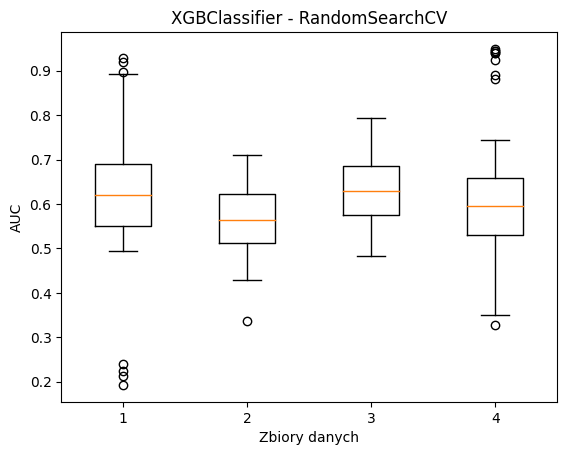

In [25]:
plt.boxplot([results_rs["a_scores"],results_rs["btsc_scores"],results_rs["d_scores"],results_rs["ba_scores"]])
plt.title("XGBClassifier - RandomSearchCV")
plt.xlabel("Zbiory danych")
plt.ylabel("AUC")
plt.show()

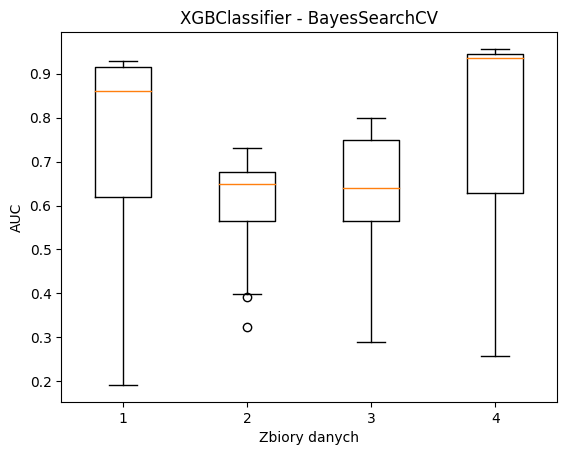

In [14]:
plt.boxplot([results_bs["a_scores"],results_bs1["scores"],results_bs2["scores"],results_bs3["scores"]])
plt.title("XGBClassifier - BayesSearchCV")
plt.xlabel("Zbiory danych")
plt.ylabel("AUC")
plt.show()

In [ ]:
ox = range(1,51,1)

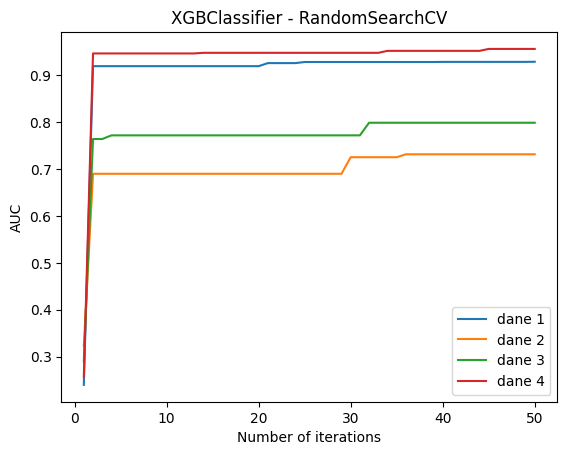

In [ ]:
plt.plot(ox, np.maximum.accumulate(results_bs['a_scores']), label='dane 1')
plt.plot(ox, np.maximum.accumulate(results_bs1['scores']), label='dane 2')
plt.plot(ox, np.maximum.accumulate(results_bs2['scores']), label='dane 3')
plt.plot(ox, np.maximum.accumulate(results_bs3['scores']), label='dane 4')
plt.legend()
plt.title("XGBClassifier - RandomSearchCV")
plt.xlabel("Number of iterations")
plt.ylabel("AUC")
plt.show()

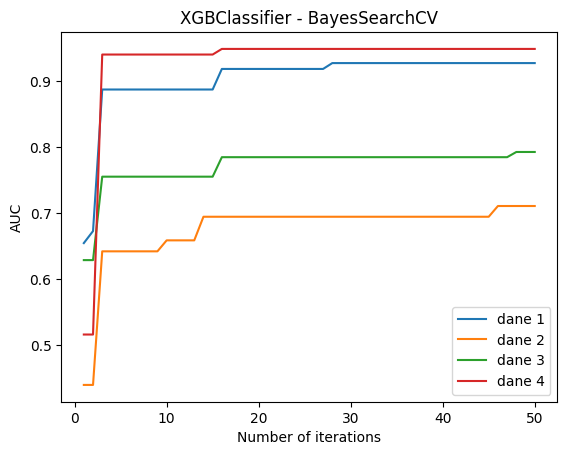

In [ ]:
plt.plot(ox, np.maximum.accumulate(results_rs['a_scores']), label='dane 1')
plt.plot(ox, np.maximum.accumulate(results_rs['btsc_scores']), label='dane 2')
plt.plot(ox, np.maximum.accumulate(results_rs['d_scores']), label='dane 3')
plt.plot(ox, np.maximum.accumulate(results_rs['ba_scores']), label='dane 4')
plt.legend()
plt.title("XGBClassifier - BayesSearchCV")
plt.xlabel("Number of iterations")
plt.ylabel("AUC")
plt.show()

# Algorythm tunability

RandomSearchCV

In [ ]:
results_rs["mean"] = results_rs.iloc[:,[1,2,3,4]].mean(axis=1)

In [ ]:
print(results_rs.loc[results_rs["mean"] == max(results_rs["mean"]),["params", "mean"]].values)

[["{'learning_rate': 0.38721346767512266, 'max_depth': 5, 'min_child_weight': 0.6010107840065457, 'n_estimators': 427}"
  0.8298166952120019]]


In [ ]:
print(results_rs.loc[results_rs["a_scores"]==np.max(results_rs["a_scores"])]["params"].values)
print(np.max(results_rs["a_scores"]))

["{'learning_rate': 1.462818994610321, 'max_depth': 1, 'min_child_weight': 0.852737873145852, 'n_estimators': 537}"]
0.9277149484292234


In [ ]:
print(results_rs.loc[results_rs["btsc_scores"]==np.max(results_rs["btsc_scores"])]["params"].values)
print(np.max(results_rs["btsc_scores"]))

["{'learning_rate': 3.2863031798333364, 'max_depth': 5, 'min_child_weight': 5.638733896169152, 'n_estimators': 1469}"]
0.7109514687100894


In [ ]:
print(results_rs.loc[results_rs["d_scores"]==np.max(results_rs["d_scores"])]["params"].values)
print(np.max(results_rs["d_scores"]))

["{'learning_rate': 2.4828028906114463, 'max_depth': 11, 'min_child_weight': 0.0023243894775694107, 'n_estimators': 1005}"]
0.7928934621457436


In [ ]:
print(results_rs.loc[results_rs["ba_scores"]==np.max(results_rs["ba_scores"])]["params"].values)
print(np.max(results_rs["ba_scores"]))

["{'learning_rate': 0.38721346767512266, 'max_depth': 5, 'min_child_weight': 0.6010107840065457, 'n_estimators': 427}"]
0.9491969708363198


BayesSearchCV

In [ ]:
print(results_bs.loc[results_bs["a_scores"] == max(results_bs["a_scores"])].values)

[["OrderedDict([('learning_rate', 0.8055763260392751), ('max_depth', 1), ('min_child_weight', 0.1861959080021024), ('n_estimators', 3623)])"
  0.928949650323864]]


In [ ]:
print(results_bs1.loc[results_bs1["scores"] == max(results_bs1["scores"])].values)

[["OrderedDict([('learning_rate', 1.1318401739447257), ('max_depth', 1), ('min_child_weight', 7.0), ('n_estimators', 4)])"
  0.7315606641123882]]


In [ ]:
print(results_bs2.loc[results_bs2["scores"] == max(results_bs2["scores"])].values)

[["OrderedDict([('learning_rate', 0.8731419199695438), ('max_depth', 15), ('min_child_weight', 0.0), ('n_estimators', 2329)])"
  0.798849252013809]]


In [ ]:
print(results_bs3.loc[results_bs3["scores"] == max(results_bs3["scores"])].values)

[[OrderedDict([('learning_rate', 1.0090035527793035), ('max_depth', 14), ('min_child_weight', 0.0), ('n_estimators', 4670)])
  0.9563096402098161]]
